In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
# 1
ds = xr.open_dataset('200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc',engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

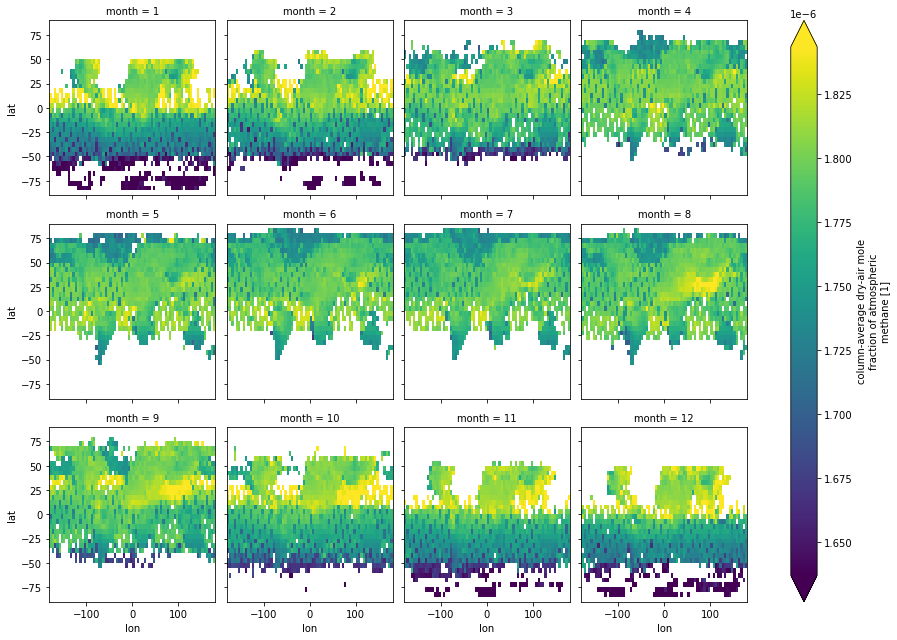

In [3]:
#1.1
ds.xch4.groupby('time.month')
xch4_clim = ds.xch4.groupby('time.month').mean()
xch4_clim.plot(col='month',col_wrap=4,robust=True)

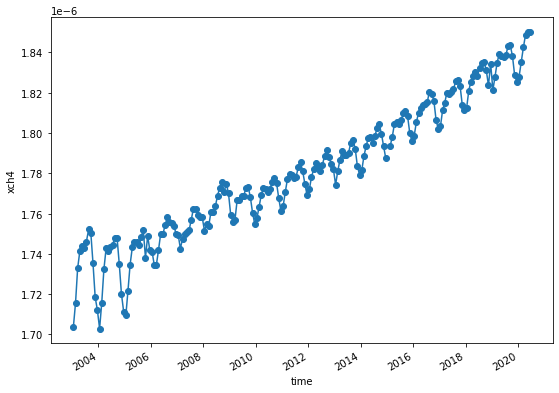

In [4]:
# 1.2
ds.xch4.mean(dim=('lon','lat'),skipna=True).sel(time=slice('2003-01','2020-06')).plot(marker='o',size=6)


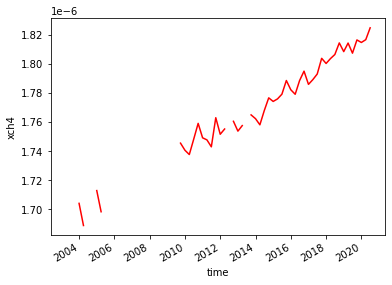

In [5]:
# 1.3
ds2 = ds.xch4.sel(lon=slice(-152.5,-147.5), lat=slice(-17.5,-12.5)).sel(time=slice('2003-01','2020-06')).mean(dim=('lat','lon'))
ds2.resample(time='Q-Dec').mean(skipna=True).plot(color='r')


In [6]:
# 2
# 2.1
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc',engine='netcdf4')
ds_re = ds.sel(lat=slice(-5,5),lon=slice(190,240))

group_data = ds_re.sst.groupby('time.month')
sst_anom = group_data - group_data.mean(dim='time')
sst_anom

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

C:\Users\李彦辰\AppData\Local\Temp/ipykernel_13352/640979989.py:5: RuntimeWarning: Mean of empty slice
  line_sst_anom =np.nanmean(sst_anom_rol,axis=(1,2))


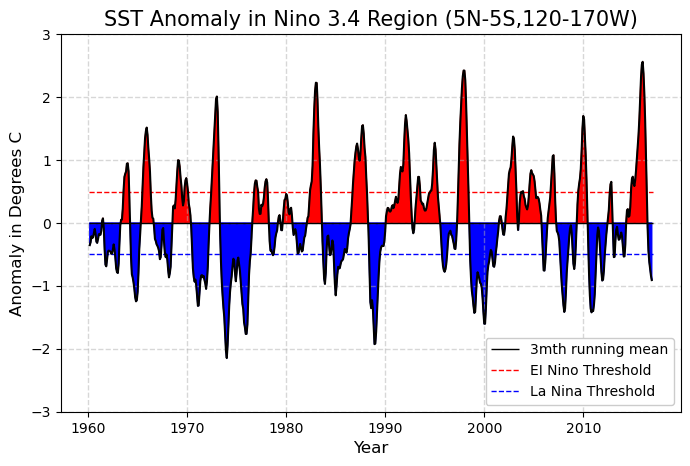

In [7]:
# 2.2
sst_anom_rol = sst_anom.rolling(time=3,center=True).mean()

fig,ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
line_sst_anom =np.nanmean(sst_anom_rol,axis=(1,2))
t = pd.date_range(start='1960-01',periods=684,freq='m') 

ax.plot(t,line_sst_anom,color='k')

ax.set_ylabel('Anomaly in Degrees C', color='k', fontsize=12)
ax.set_xlabel('Year', color='k', fontsize=12)
ax.set_title('SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)',fontsize=15)
ax.set_ylim(-3,3)

ax.grid(linestyle='--', linewidth=1, alpha=0.5)
ax.hlines(y=0,xmin=t[0],xmax=t[-1],color='k',ls='-',linewidth=1,label='3mth running mean')
ax.hlines(y=0.5,xmin=t[0],xmax=t[-1],color='r',ls='--',linewidth=1,label='EI Nino Threshold')
ax.hlines(y=-0.5,xmin=t[0],xmax=t[-1],color='b',ls='--',linewidth=1,label='La Nina Threshold')

ax.legend(fontsize=10,frameon=True,framealpha=1,shadow=False)

ax.fill_between(t,line_sst_anom,where=(line_sst_anom>0),color='r') 
ax.fill_between(t,line_sst_anom,where=(line_sst_anom<0),color='b') 


In [3]:
# 3 
ds = xr.open_dataset('air.sig995.2012.nc',engine='netcdf4')
ds

D:\LI_YANCHEN\APP_INSTALL\Anaconda3\lib\site-packages\xarray\coding\times.py:150: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 366)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        mean daily NMC reanalysis (2012)
    history:      created 2011/12 by Hoop (netCDF2.3)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Text(0.5, 0, 'Time')

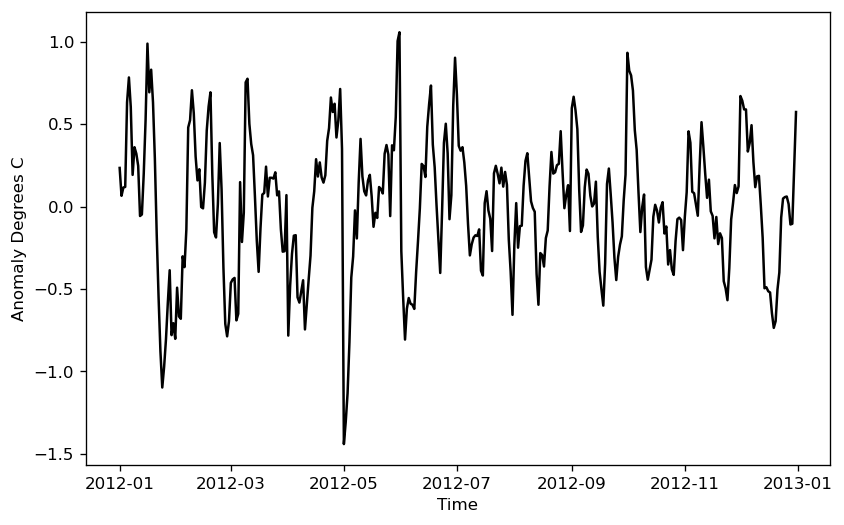

In [12]:
# 3
# 3.1
group_data = ds.air.groupby('time.month')
air_anom = group_data - group_data.mean(dim='time')
line_air = air_anom.mean(dim=('lat','lon'))

time = pd.date_range(start='2012-01-01',periods=366,freq='d')
fig,ax = plt.subplots(1,1,figsize = (8,5),dpi=120)
ax.plot(time,line_air,color='k')
ax.set_ylabel('Anomaly Degrees C', color='k', fontsize=10)
ax.set_xlabel('Time', color='k', fontsize=10)


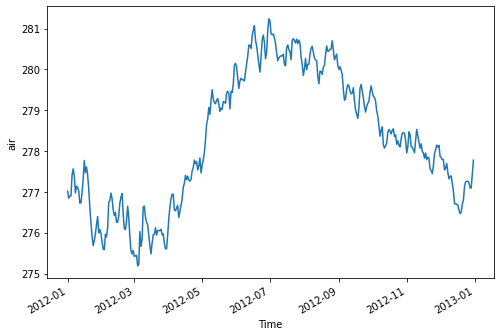

In [13]:
# 3.2 
# 1 2012-01-01到2012-12-31的全球平均气温的时间序列
ds.air.mean(dim=('lon','lat')).sel(time=slice('2012-01-01','2012-12-31')).plot(x='time',figsize=(8,5))


Text(0.5, 1.0, 'Mean Monthly Air Temperature (K)')

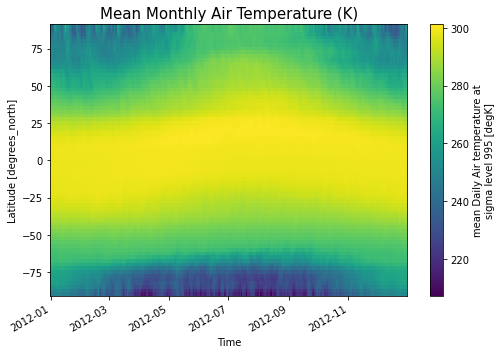

In [14]:
# 3.2
# 2 不同纬度全球月平均空气的气温
mean_monthly = ds.air.groupby('time.month').mean(dim=('lon'))
mean_monthly.plot(x='time',figsize=(8,5))
plt.title('Mean Monthly Air Temperature (K)', fontsize=15)

Text(0.5, 1.0, 'Average Temperature at Different Latitudes in 2012 (centigrade)')

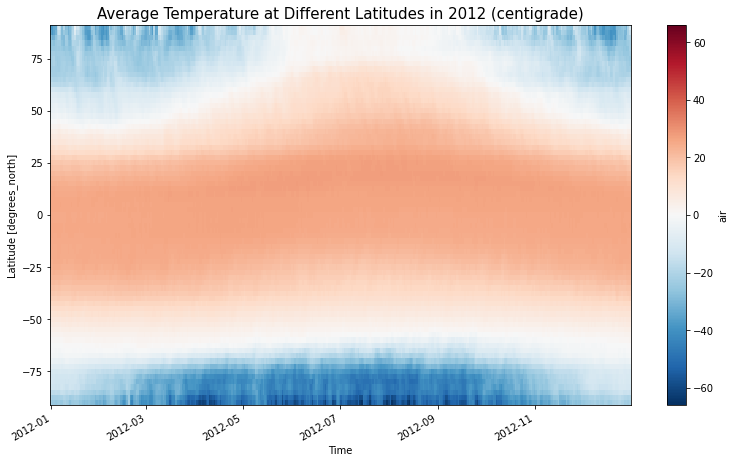

In [15]:
# 3.2
# 3 2012年不同纬度的平均温度（摄氏度表示）
C_tem = ds.air - 273.15
C_tem.mean(dim=('lon')).plot(x='time',figsize=(13,7))
plt.title('Average Temperature at Different Latitudes in 2012 (centigrade)', fontsize=15)

Text(0.5, 1.0, 'Nov & Dec mean air temperature (K)')

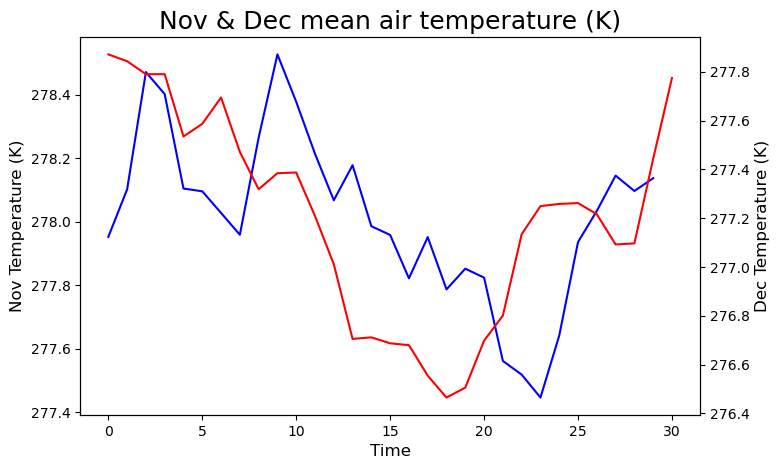

In [16]:
# 3.2
# 4 全球11月和12月的平均空气温度
fig, ax1 = plt.subplots(1,1,figsize=(8,5), dpi=100)
mean_Nov_tem = ds.air.sel(time=slice('2012-11-01','2012-11-30')).mean(dim=('lon','lat'))
ax1.plot(mean_Nov_tem,color='b')

ax2 = ax1.twinx()
mean_Dec_tem = ds.air.sel(time=slice('2012-12-01','2012-12-31')).mean(dim=('lon','lat'))
ax2.plot(mean_Dec_tem,color='r')

ax1.set_xlabel('Time', color='k',fontsize=12)
ax1.set_ylabel('Nov Temperature (K)', color='k',fontsize=12)
ax2.set_ylabel('Dec Temperature (K)', color='k',fontsize=12)
ax1.set_title('Nov & Dec mean air temperature (K)', color='k', fontsize=18)

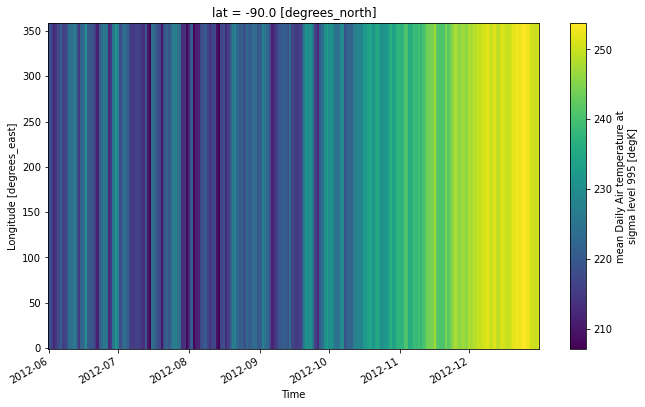

In [17]:
# 3.2 
# 5 南极点下半年的平均气温
ds.air.sel(lat=-90,method='nearest').sel(time=slice('2012-06-01','2012-12-31')).plot(x='time',figsize=(11,6))